In [39]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# to create dummy data
from sklearn.datasets import make_classification

In [40]:
X, y = make_classification(n_samples=10000, n_classes=2, weights=[1,1], random_state=1)

# n_classes => no. o/p feature (here it is 0 and 1)
# weights => here it is balanced (if it was [0.5,5], then it would be imbalanced dataset)

In [41]:
X

array([[-0.23629978, -1.05493612, -0.43290515, ..., -0.3493208 ,
        -1.11850064,  0.3847425 ],
       [ 0.19173349, -2.3689596 , -0.49565017, ...,  0.18279077,
         0.21356147,  0.49222565],
       [ 0.26559616, -0.53611925, -0.14163292, ...,  0.62926365,
         1.07755487,  0.94463163],
       ...,
       [-0.69998136,  1.32415374, -0.85002558, ..., -0.22088742,
         2.72373949, -0.48296092],
       [ 1.74253803,  0.32763222, -0.43618563, ..., -0.29079439,
         0.37285878, -0.39378543],
       [-0.81545439,  0.04712317, -0.63314742, ..., -0.0127121 ,
         0.82512065,  1.30908699]])

In [42]:
X.shape

(10000, 20)

In [43]:
y

array([1, 0, 1, ..., 1, 1, 0])

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [45]:
X_train

array([[-1.5838042 ,  0.87924609, -0.27765563, ...,  0.99782293,
         1.55240989, -2.08452324],
       [-0.72872472,  1.03903101,  0.21547987, ...,  0.25819851,
         0.6539945 ,  0.39867918],
       [ 0.67644336,  0.24933796,  0.21453529, ..., -0.48332646,
        -0.55080868,  0.9979384 ],
       ...,
       [ 0.06691259,  0.70358266,  1.26539575, ...,  0.71832818,
        -1.18215876, -1.95864668],
       [-1.56807435,  0.70029751,  1.33767084, ..., -0.02363495,
         0.38503059,  1.6856741 ],
       [-0.41938575, -0.18277587, -0.5381752 , ...,  1.02274135,
        -1.81052686,  0.42438051]])

In [46]:
from sklearn.metrics import roc_auc_score, roc_curve

## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [58]:
# predict_proba() -> it is used to calculate the probability for wach sample's probability to be 1 or 0


y_train_pred = rf_model.predict_proba(X_train)
y_test_pred = rf_model.predict_proba(X_test)
y_train_pred[:, 1]  ## y_train_pred will return 2 columns as we have done predict_proba, we are taking the 1 column here
print("RF training roc-auc: {}".format(roc_auc_score(y_train, y_train_pred[:,1])))
print("RF test roc-auc: {}".format(roc_auc_score(y_test, y_test_pred[:,1])))

RF training roc-auc: 1.0
RF test roc-auc: 0.9936156756285879


## Logistic Regression

In [53]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(X_train, y_train)
y_train_pred = log_model.predict_proba(X_train)
y_test_pred = log_model.predict_proba(X_test)
print("Logistic training roc-auc: {}".format(roc_auc_score(y_train, y_train_pred[:,1])))
print("Logistic test roc-auc: {}".format(roc_auc_score(y_test, y_test_pred[:,1])))

Logistic training roc-auc: 0.9939927849418968
Logistic test roc-auc: 0.9928407743412785


## Adaboost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
ada_model = AdaBoostClassifier()
ada_model.fit(X_train, y_train)
y_train_pred = ada_model.predict_proba(X_train)
y_test_pred = ada_model.predict_proba(X_test)
print("Adaboost training roc-auc: {}".format(roc_auc_score(y_train, y_train_pred[:,1])))
print("Adaboost test roc-auc: {}".format(roc_auc_score(y_test, y_test_pred[:,1])))

Adaboost training roc-auc: 0.9983950528394598
Adaboost test roc-auc: 0.9923858781740508


## KNN Classifier

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
y_train_pred = knn_model.predict_proba(X_train)
y_test_pred = knn_model.predict_proba(X_test)
print("KNN training roc-auc: {}".format(roc_auc_score(y_train, y_train_pred[:,1])))
print("KNN test roc-auc: {}".format(roc_auc_score(y_test, y_test_pred[:,1])))

KNN training roc-auc: 0.968588774667884
KNN test roc-auc: 0.92166230215239


## By Default it is selecting 0.5 as thresold, we will now see the best thresold value for max accuracy.
## Also we will see 4 algo together

In [80]:
## predicting for all the models and storing them in "pred". Then concatinating all the 4 models column wise

pred = []
for model in [rf_model, log_model, ada_model, knn_model]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
pd.concat(pred, axis=1)

,0,1,2,3
0,1.00,0.990154,0.694267,1.0
1,0.98,0.997793,0.525002,0.6
2,0.99,0.999904,0.565434,1.0
3,1.00,0.999873,0.565385,1.0
4,0.00,0.005359,0.465820,0.0
...,...,...,...,...
2995,0.99,0.949541,0.521827,0.4
2996,0.00,0.004828,0.466807,0.4
2997,0.99,0.987525,0.531302,1.0
2998,1.00,0.998042,0.549850,0.8


In [78]:
## Taking mean of all the concatinated samples and storing them in "final_prediction"

final_prediction = pd.concat(pred, axis=1).mean(axis=1)
pd.DataFrame(final_prediction)

,0
0,0.921105
1,0.775699
2,0.888834
3,0.891315
4,0.117795
...,...
2995,0.715342
2996,0.217909
2997,0.877207
2998,0.836973


In [76]:
print("Ensemble roc-auc score: {}".format(roc_auc_score(y_test, final_prediction)))

Ensemble roc-auc score: 0.9909909669665824


## ROC Curve

In [81]:
from sklearn.metrics import roc_curve
fpr, tpr, thresolds = roc_curve(y_test, final_prediction)
thresolds

array([1.92492837, 0.92492837, 0.91628969, 0.91612562, 0.91524886,
       0.91506589, 0.88601349, 0.88600376, 0.86661831, 0.86641984,
       0.86275924, 0.86267974, 0.86112038, 0.8607745 , 0.85022774,
       0.85010582, 0.8238499 , 0.82379736, 0.82140902, 0.82140726,
       0.81612022, 0.8160946 , 0.80148002, 0.80121636, 0.78748821,
       0.78729201, 0.78292553, 0.78280856, 0.78068849, 0.78066668,
       0.73698038, 0.73691542, 0.72399166, 0.72393883, 0.72374255,
       0.72281933, 0.71014531, 0.70975751, 0.67031175, 0.66891135,
       0.65990099, 0.65924178, 0.64665422, 0.64603438, 0.62648698,
       0.62544135, 0.61836772, 0.61169533, 0.60846656, 0.60441109,
       0.60301897, 0.60062954, 0.59806654, 0.58682262, 0.57770091,
       0.5759754 , 0.55829978, 0.55776262, 0.53749516, 0.53428892,
       0.52230625, 0.47722114, 0.47016557, 0.46505126, 0.46392908,
       0.40403434, 0.39862104, 0.32469783, 0.32443695, 0.22801584,
       0.22787529, 0.18121212, 0.18119639, 0.17106405, 0.17099

In [87]:
from sklearn.metrics import accuracy_score
accuracy_list = []
for thres in thresolds:
    # if predicted point is greater thean thresold then it will be 1 otherwise 0
    y_pred = np.where(final_prediction > thres, 1, 0)
    accuracy_list.append(accuracy_score(y_test, y_pred, normalize=True))
    
accuracy_list = pd.concat([pd.Series(thresolds), pd.Series(accuracy_list)], axis=1)
accuracy_list.columns = ['Thresolds', 'Accuracy']
accuracy_list.sort_values(by = 'Accuracy', ascending = False, inplace = True)
accuracy_list.head()

,Thresolds,Accuracy
59,0.534289,0.986333
60,0.522306,0.986000
57,0.557763,0.986000
58,0.537495,0.986000
55,0.575975,0.985667


## Drawing the ROC Curve

In [98]:
def plot_rouc_curve(fpr, tpr):
    plt.figure(figsize=(3,3))
    plt.plot(fpr, tpr, color = 'orange', label = 'ROC')
    plt.plot([0,1], [0,1], color = 'darkblue', linestyle = '--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic(ROC) curve')
    plt.legend()
    plt.show()

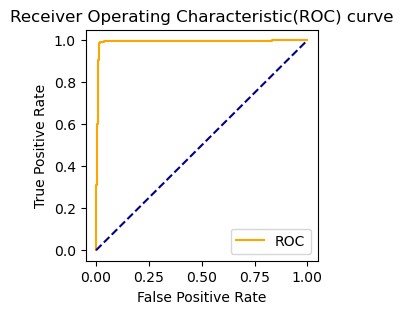

In [99]:
plot_rouc_curve(fpr,tpr)